# Алгоритмы множественного обучения

Существует класс алгоритмов визуализации, называемых 
алгоритмами множественного обучения (manifold learning algorithms), 
которые используют гораздо более сложные графические представления
данных и позволяют получить визуализации лучшего качества. Особенно 
полезным является алгоритм t-SNE.

*Идея, лежащая в основе алгоритма t-SNE, заключается в том, чтобы найти двумерное представление данных, 
сохраняющее расстояния между точками наилучшим образом. t-SNE 
начинает свою работу со случайного двумерного представления каждой 
точки данных, а затем пытается сблизить точки, которые в пространстве
исходных признаков находятся близко друг к другу, и отдаляет друг от 
друга точки, которые находятся далеко друг от друга. При этом t-SNE 
уделяет большее внимание сохранению расстояний между точками, 
близко расположенными друг к другу. Иными словами, он пытается 
сохранить информацию, указывающую на то, какие точки являются 
соседями друг другу*

- алгоритм применяется только к обучающему набору (для разведовательного анализа)

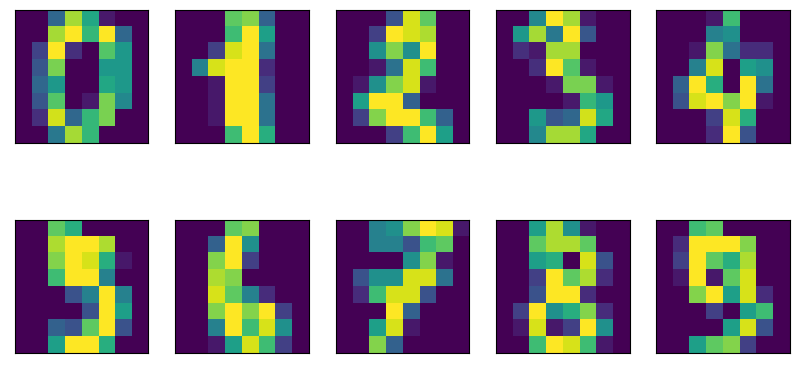

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Давайте используем PCA для визуализации данных, сведя их к двум 
измерениям. Мы построим график первых двух главных компонент и 
представим каждую точку данных в виде цифры, соответствующей ее 
классу 

In [2]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Вторая главная компонента')

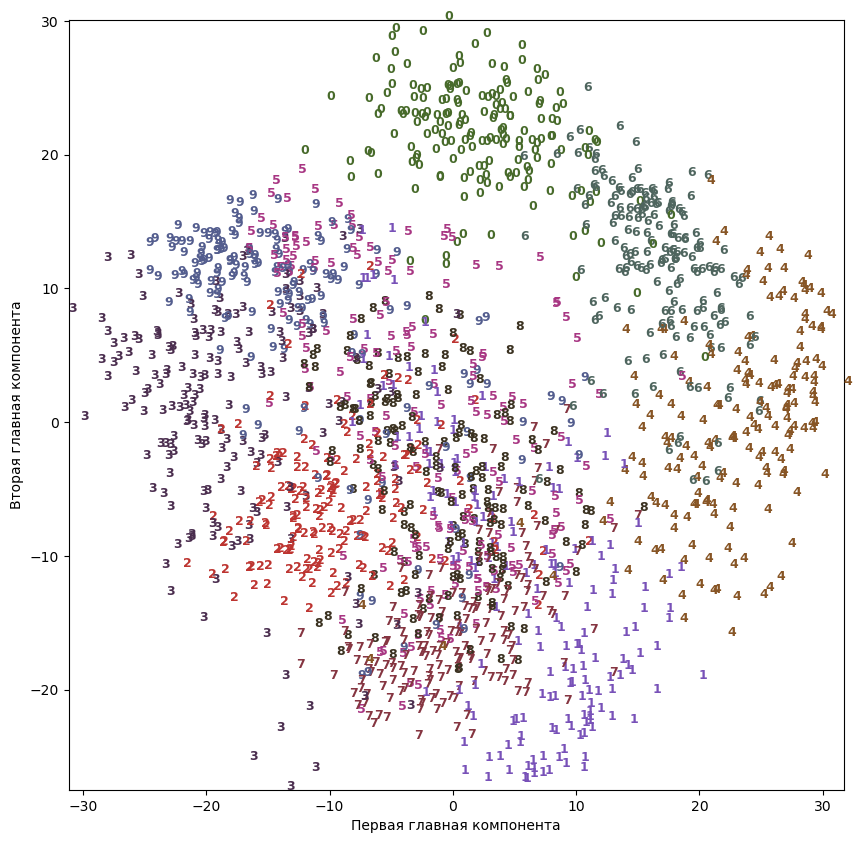

In [3]:
#строим модель PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\dermi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'Вторая главная компонента')

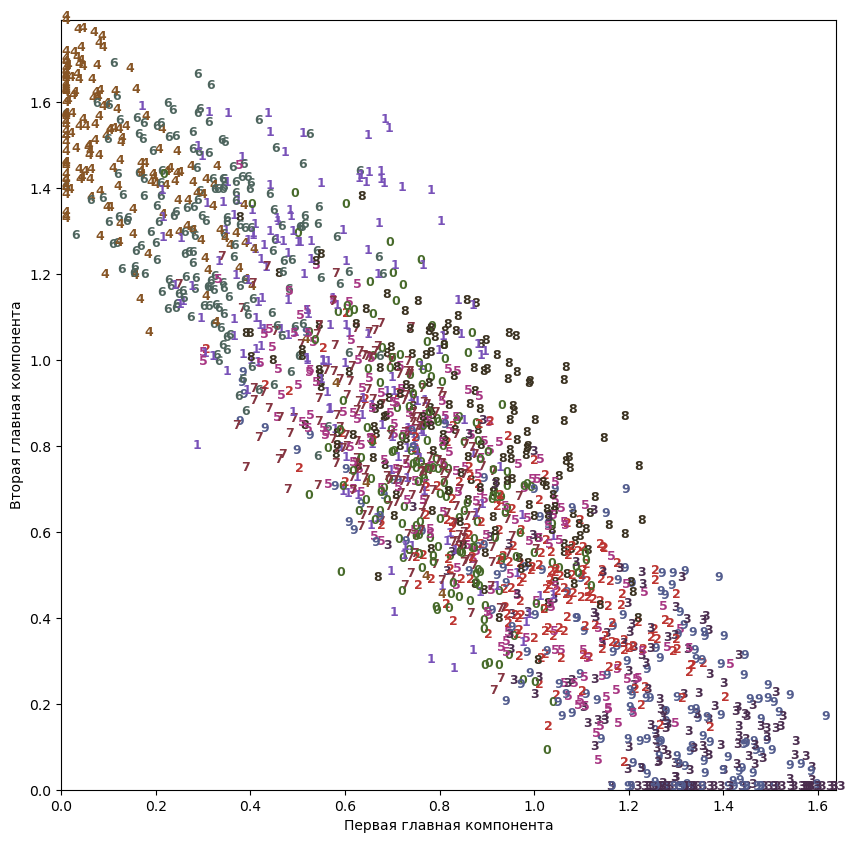

In [4]:
from sklearn.decomposition import NMF
#строим модель NMF
nmf = NMF(n_components=2)
nmf.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_nmf = nmf.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_nmf[:, 0].min(), digits_nmf[:, 0].max())
plt.ylim(digits_nmf[:, 1].min(), digits_nmf[:, 1].max())
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_nmf[i, 0], digits_nmf[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

--------------------------

Алгоритм t-SNE имеет некоторые настраиваемые параметры, хотя, как 
правило, дает хорошее качество, когда используются настройки по 
умолчанию. Вы можете поэкспериментировать с параметрами perplexity
и early_exaggeration, но эффекты от их применения обычно 
незначительны.

C:\Users\dermi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\dermi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE признак 1')

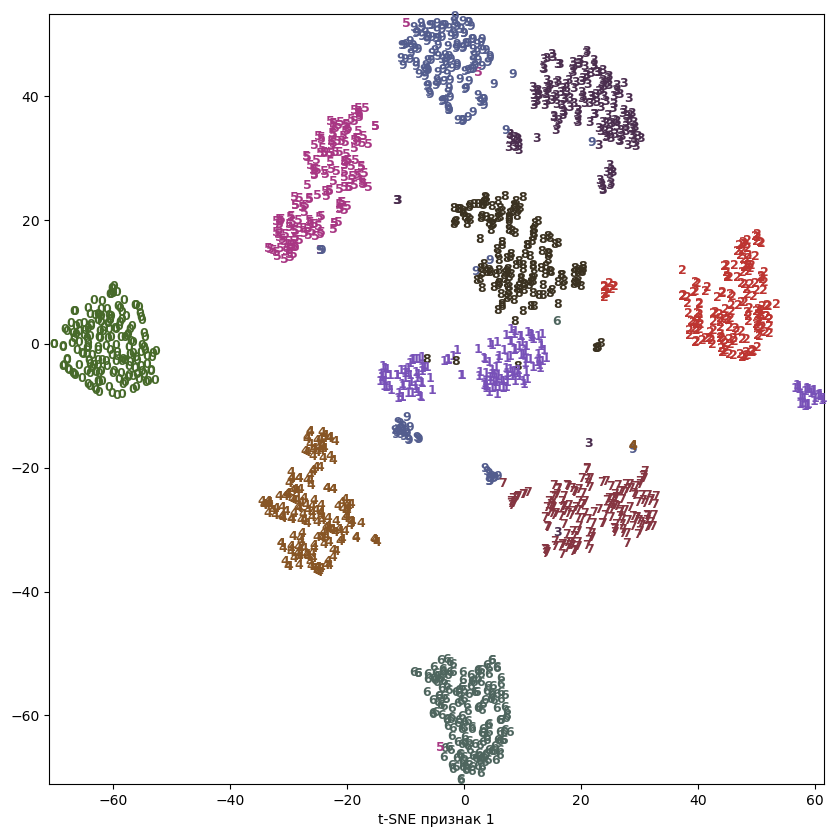

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
digits_tsne = tsne.fit_transform(digits.data)
 
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),color = colors[digits.target[i]],fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")


Результат, полученный с помощью t-SNE, весьма примечателен. Все 
классы довольно четко разделены. Единицы и девятки в некоторой 
степени распались, однако большинство классов образуют отдельные 
сплоченные группы.

------------------------
Алгоритмы множественного обучения в основном направлены на 
визуализацию и поэтому редко используются для получения более двух 
новых характеристик. Некоторые из них, в том числе t-SNE, создают
новое представление обучающих данных, но при этом не осуществляют
преобразования новых данных. Это означает, что данные алгоритмы 
нельзя применить к тестовому набору, они могут преобразовать лишь те
данные, на которых они были обучены.